In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:

# Load a pre-trained model and dataset (e.g., MobileNetV2 and an example image from CIFAR-10)
model = tf.keras.applications.MobileNetV2(weights="imagenet")
image_path = tf.keras.utils.get_file(
    "elephant.jpg", "https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg"
)


In [6]:

# Preprocess the image for MobileNetV2
original_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_image = tf.keras.preprocessing.image.img_to_array(original_image)
input_image = tf.keras.applications.mobilenet_v2.preprocess_input(input_image)
input_image = np.expand_dims(input_image, axis=0)


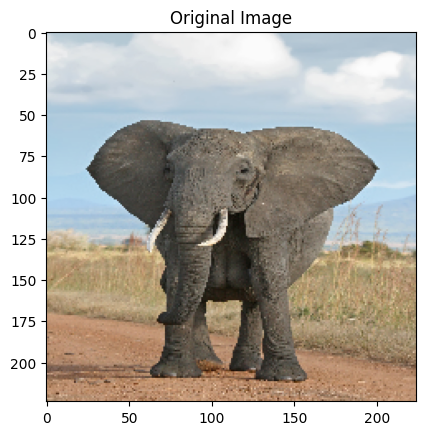

In [7]:

# Display the original image
plt.imshow(original_image)
plt.title("Original Image")
plt.show()


In [8]:

# Define the loss and gradients for the FGSM attack
loss_object = tf.keras.losses.CategoricalCrossentropy()


In [12]:

def create_adversarial_pattern(input_image, input_label):
    # Convert input_image to a TensorFlow Variable
    input_image = tf.convert_to_tensor(input_image)  # Ensure input is a Tensor
    with tf.GradientTape() as tape:
        tape.watch(input_image)  # Explicitly watch the input tensor
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t the input image
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad


In [13]:

# Create a one-hot label for the "elephant" class
elephant_label = tf.one_hot([386], model.output_shape[-1])  # Class index for "elephant"
elephant_label = tf.reshape(elephant_label, (1, -1))


In [15]:

# Generate adversarial pattern
perturbations = create_adversarial_pattern(input_image, elephant_label)


In [26]:

# Apply the perturbations to create the adversarial image
epsilon = 0.11  # Amount of perturbation
adversarial_image = input_image + epsilon * perturbations
adversarial_image = tf.clip_by_value(adversarial_image, -1, 1)  # Keep pixel values in range


In [27]:

# Display the adversarial image
adversarial_image_display = tf.keras.applications.mobilenet_v2.decode_predictions(
    model.predict(adversarial_image), top=1
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


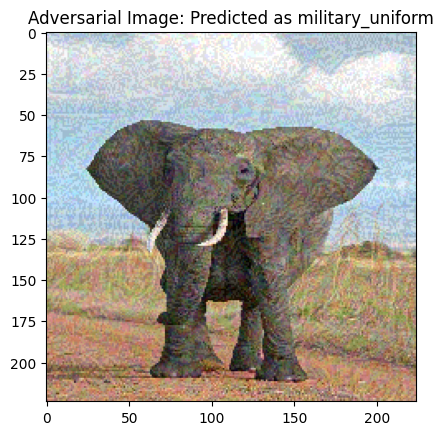

In [28]:

plt.imshow((adversarial_image[0] * 127.5 + 127.5).numpy().astype("uint8"))
plt.title(f"Adversarial Image: Predicted as {adversarial_image_display[0][0][1]}")
plt.show()
